# Code for further analysis of the ijsselmeer chlorofyl for PWNT

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime
# file = open('/geo_info/02_Werkplaatsen/UITWISSELEN/JonathanG/KNMI_winddata/KNMI_20190811.txt')
# file = open('/geo_info/02_Werkplaatsen/UITWISSELEN/JonathanG/KNMI_winddata/KNMI_20190811_hourly.txt')
file = open('/data/KNMI/KNMI_20190811_hourly.txt')

lines = file.read().splitlines()
lines = [line.split(',') for line in lines if line[0] != "#"]



In [3]:
def convert_degree(degree):
    if 0 < degree <= 45:
        return 'NNO'
    if 45 < degree <= 90:
        return 'ONO'
    if 90 < degree <= 135:
        return 'OZO'
    if 135 < degree <= 180:
        return 'ZZO'
    if 180 < degree <= 225:
        return 'ZZW'
    if 225 < degree <= 270:
        return 'WZW'
    if 270 < degree <= 315:
        return 'WNW'
    if 315 < degree <= 360:
        return 'NNW'
    return 'UNSURE'

def pad_hours(hour):
    if len(hour) < 2:
        return "0" + hour
    else:
        return hour

df = pd.DataFrame(lines, columns=['station', 'date', 'hours', 'average_wind_direction_degree', 'average_wind_speed'])
df['hours'] = df['hours'].apply(pad_hours)
df['hours'] = df['hours'].str.strip()
# print(df['hours'])
df['hours'] = df['hours'].replace('24', '0')

df['date_combined'] = df['date'] + ':' + df['hours']


# print(df['date_combined'])
df['date'] = pd.to_datetime(df['date_combined'], format='%Y%m%d:%H')
# df['date'] = pd.to_datetime(df['date_combined'])
# df['date'] = df['date_combined'].apply(convert_time)
# df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.drop(['station'], axis=1, inplace=True)
station_stavoren = df.dropna()
station_stavoren['average_wind_direction_degree'] = station_stavoren['average_wind_direction_degree'].str.strip()
station_stavoren['average_wind_speed'] = station_stavoren['average_wind_speed'].str.strip()
station_stavoren['average_wind_speed'] = pd.to_numeric(station_stavoren['average_wind_speed']) / 10
station_stavoren['average_wind_direction_degree'] = pd.to_numeric(station_stavoren['average_wind_direction_degree'])
station_stavoren['wind_direction_cat'] = station_stavoren['average_wind_direction_degree'].apply(convert_degree)
station_stavoren.set_index('date', inplace=True)
station_stavoren['date'] = station_stavoren.index
station_stavoren.head()

,hours,average_wind_direction_degree,average_wind_speed,date_combined,wind_direction_cat,date
date,,,,,,
2016-01-01 01:00:00,1,210.0,8.0,20160101:1,ZZW,2016-01-01 01:00:00
2016-01-01 02:00:00,2,200.0,6.0,20160101:2,ZZW,2016-01-01 02:00:00
2016-01-01 03:00:00,3,200.0,5.0,20160101:3,ZZW,2016-01-01 03:00:00
2016-01-01 04:00:00,4,220.0,5.0,20160101:4,ZZW,2016-01-01 04:00:00
2016-01-01 05:00:00,5,220.0,3.0,20160101:5,ZZW,2016-01-01 05:00:00


,hours,average_wind_direction_degree,average_wind_speed,date_combined,wind_direction_cat,date
date,,,,,,
2018-07-21 01:00:00,1,40.0,5.0,20180721:1,NNO,2018-07-21 01:00:00
2018-07-21 02:00:00,2,50.0,4.0,20180721:2,ONO,2018-07-21 02:00:00
2018-07-21 03:00:00,3,40.0,4.0,20180721:3,NNO,2018-07-21 03:00:00
2018-07-21 04:00:00,4,30.0,4.0,20180721:4,NNO,2018-07-21 04:00:00
2018-07-21 05:00:00,5,30.0,4.0,20180721:5,NNO,2018-07-21 05:00:00
2018-07-21 06:00:00,6,30.0,4.0,20180721:6,NNO,2018-07-21 06:00:00
2018-07-21 07:00:00,7,40.0,4.0,20180721:7,NNO,2018-07-21 07:00:00
2018-07-21 08:00:00,8,40.0,3.0,20180721:8,NNO,2018-07-21 08:00:00
2018-07-21 09:00:00,9,340.0,2.0,20180721:9,NNW,2018-07-21 09:00:00


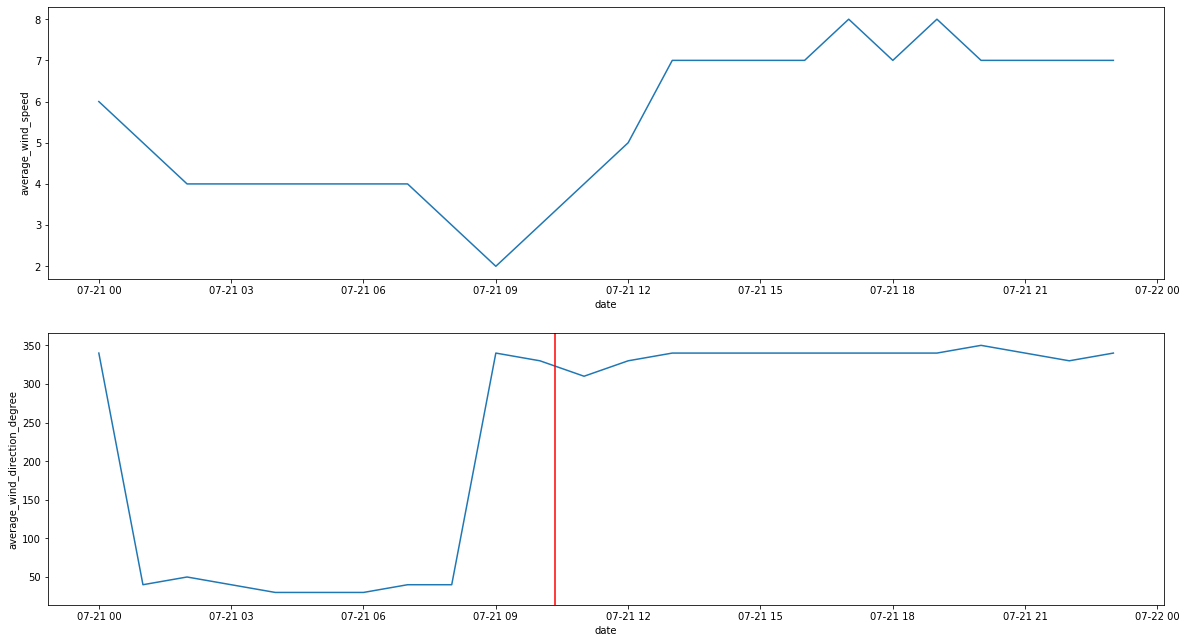

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(20,11))
start = '2018-7-21'
end = '2018-7-21'
satellite_stamp = '2018-07-21 10:21:06'
sns.lineplot(data=station_stavoren.loc[start:end], x='date', y='average_wind_speed', ax=ax[0])
# plt.axvline(satellite_stamp, 0,15, color='r')
sns.lineplot(data=station_stavoren.loc[start:end], x='date', y='average_wind_direction_degree', ax=ax[1])
plt.axvline(satellite_stamp, 0,15, color='r')
station_stavoren.loc[start:end]
# station_stavoren.loc[station_stavoren['average_wind_direction_degree'] == ""]
# station_stavoren['average_wind_direction_degree'].iloc[0]

In [11]:
station_stavoren.loc['2018-07-2']
# station_stavoren.loc[station_stavoren['wind_direction_cat'] == 'UNSURE']


,hours,average_wind_direction_degree,average_wind_speed,date_combined,wind_direction_cat,date
date,,,,,,
2018-07-02 01:00:00,1,70.0,5.0,20180702:1,ONO,2018-07-02 01:00:00
2018-07-02 02:00:00,2,80.0,5.0,20180702:2,ONO,2018-07-02 02:00:00
2018-07-02 03:00:00,3,80.0,4.0,20180702:3,ONO,2018-07-02 03:00:00
2018-07-02 04:00:00,4,80.0,4.0,20180702:4,ONO,2018-07-02 04:00:00
2018-07-02 05:00:00,5,90.0,4.0,20180702:5,ONO,2018-07-02 05:00:00
2018-07-02 06:00:00,6,100.0,5.0,20180702:6,OZO,2018-07-02 06:00:00
2018-07-02 07:00:00,7,90.0,5.0,20180702:7,ONO,2018-07-02 07:00:00
2018-07-02 08:00:00,8,100.0,4.0,20180702:8,OZO,2018-07-02 08:00:00
2018-07-02 09:00:00,9,60.0,4.0,20180702:9,ONO,2018-07-02 09:00:00


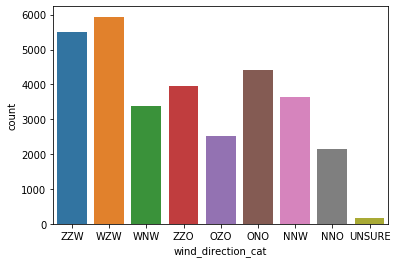

In [12]:
sns.countplot(x='wind_direction_cat', data=station_stavoren)